1000.0
16000.0
0.01


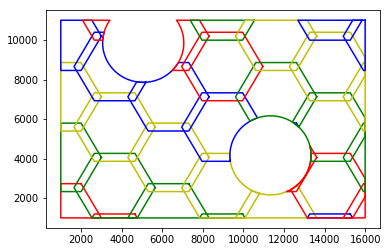

In [16]:
import numpy as np
import math
from Matrix2d import Rotate_Points
import matplotlib.pyplot as plt
from CLI_Reader import CLI
def get_one_honeycomb(cenx,ceny,length):
    p1=(cenx-0.5*length,ceny+0.866*length)
    p2=(cenx+0.5*length,ceny+0.866*length)
    p3=(cenx+length,ceny)
    p4=(cenx+0.5*length,ceny-0.866*length)
    p5=(cenx-0.5*length,ceny-0.866*length)
    p6=(cenx-length,ceny)
    p7=(cenx-0.5*length,ceny+0.866*length)
    return np.array([p1,p2,p3,p4,p5,p6,p7])
def get_all_honeycomb(honeycombLength ,overlap,minx,miny,maxx,maxy,boundry):
    honeys=[]
    LengthY = 1.732 * honeycombLength - overlap
    LengthX = 0.866 * LengthY
    startX=minx
    startY=miny
    step_width=int((maxx-minx)/LengthX+2)
    step_height=int((maxy-miny)/LengthY+2)
    for j in range(step_width):
        
        if j%2==0:
            startY=miny
        else:
            startY=miny-0.5*LengthY
        for i in range(step_height):
            pc=pyclipper.Pyclipper()
            honeycomb=get_one_honeycomb(startX,startY,honeycombLength)
            #print(honeycomb)
            pc.AddPath(honeycomb,0)
            pc.AddPaths(boundry,1)
            w=pc.Execute(0,0,0)
            if w!=[]:
                honeys.append(w)
            #honeys.append(honeycomb)
            startY=startY+LengthY
        startX=startX+LengthX 
    return np.array(honeys)
if __name__=='__main__':
    import pyclipper
    path=r"F:\qp\bool_1.cli"
    cli=CLI(path)
    minx=cli.Xmin/cli.unit
    miny=cli.Ymin/cli.unit
    maxx=cli.Xmax/cli.unit
    maxy=cli.Ymax/cli.unit
    print(minx)
    print(maxx)
    print(cli.unit)
    boundry=cli.UsePoint[0]
    #boundry=np.array([[(minx,miny),(minx,maxy),(maxx,maxy),(maxx,miny),(minx,miny)],[(0,0),(0,100),(100,100),(100,0),(0,0)]])
    q=get_all_honeycomb(20/cli.unit,4/cli.unit,minx,miny,maxx,maxy,boundry)
    
    owi=0
    for w in q:
        for i in w:
            
            X=np.append(np.array(i)[:,0],[np.array(i)[0,0]],axis=0)
            Y=np.append(np.array(i)[:,1],[np.array(i)[0,1]],axis=0)
            if owi%4==0:
                plt.plot(X,Y,color='r')
            elif owi%4==1:
                plt.plot(X,Y,color='g')
            elif owi%4==2:
                plt.plot(X,Y,color='y')
            else:
                plt.plot(X,Y,color='b')
            owi+=1
    '''for w in boundry:
        plt.plot(np.array(w)[:,0],np.array(w)[:,1],color='black')'''
   
    plt.show()    
    